In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
!pip install basemap
from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving casualties.csv to casualties.csv
Saving vehicles.csv to vehicles.csv
Saving accidents.csv to accidents.csv


In [6]:
accidents = pd.read_csv('accidents.csv',index_col='Accident_Index')
casualties=pd.read_csv('casualties.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv('vehicles.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [7]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04-01-2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05-01-2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06-01-2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07-01-2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10-01-2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [8]:
accidents = accidents.join(vehicles, how='outer')

In [9]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

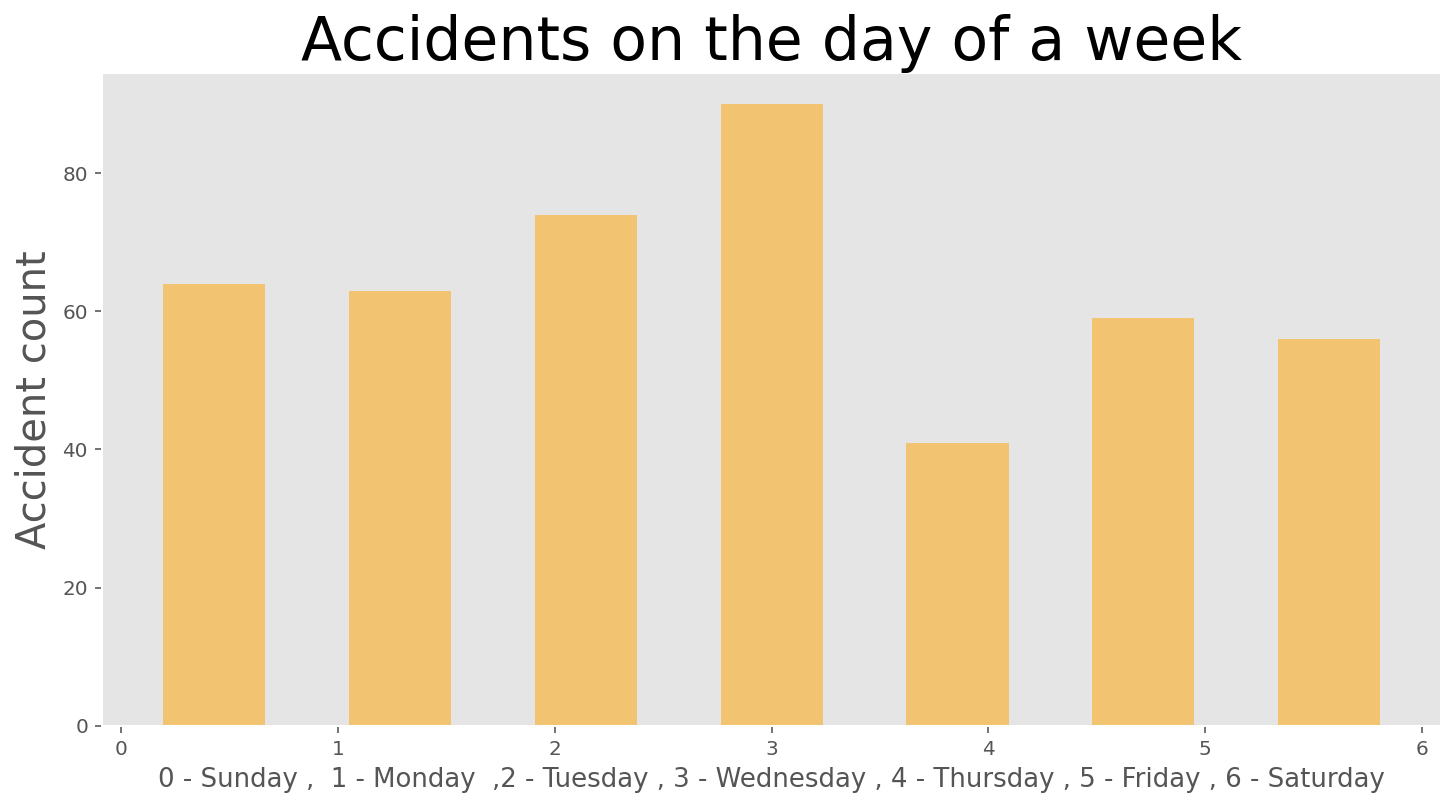

In [10]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

Text(0, 0.5, 'Accident count')

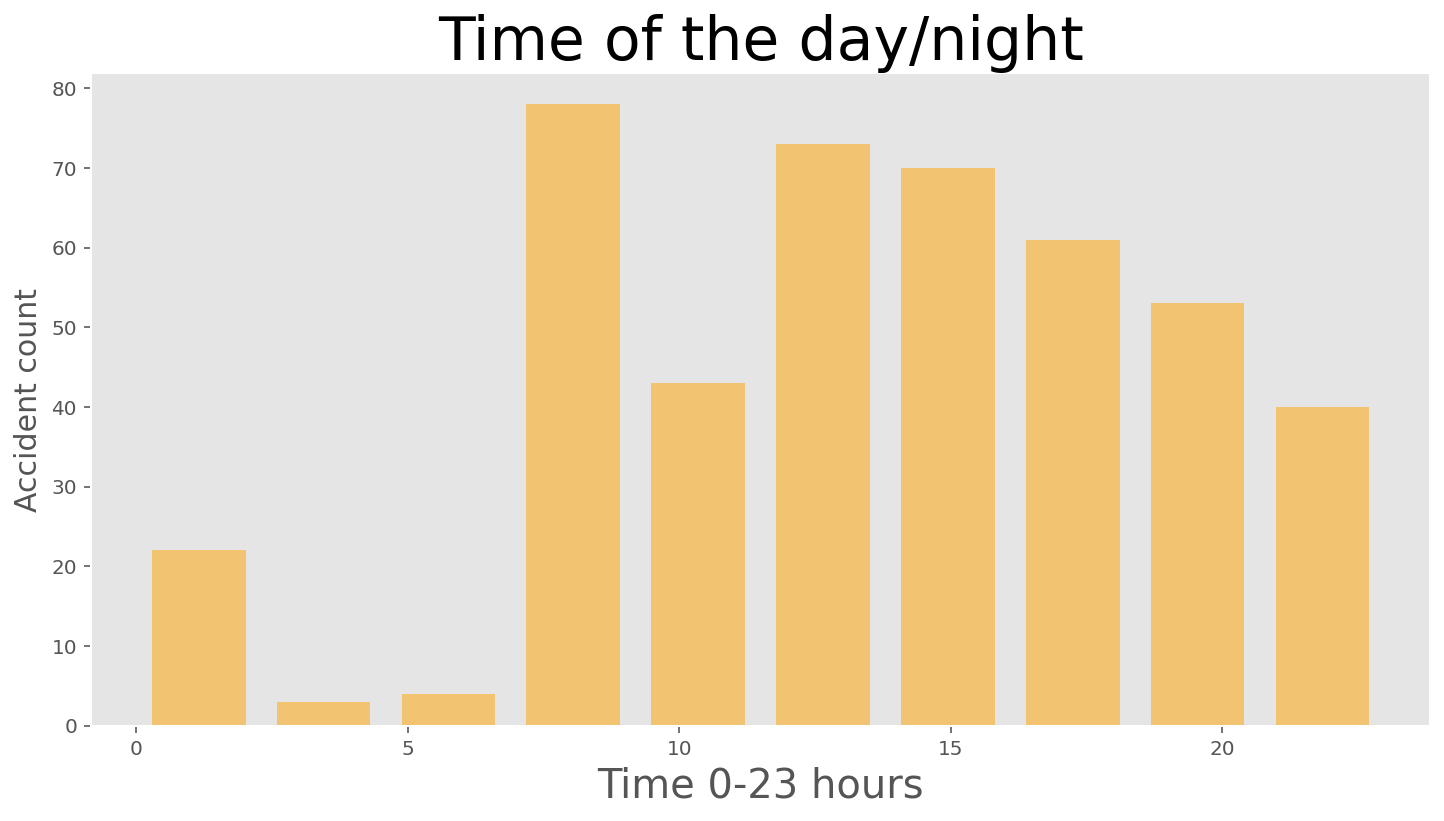

In [11]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

Text(0.5, 0, 'Age of Drivers')

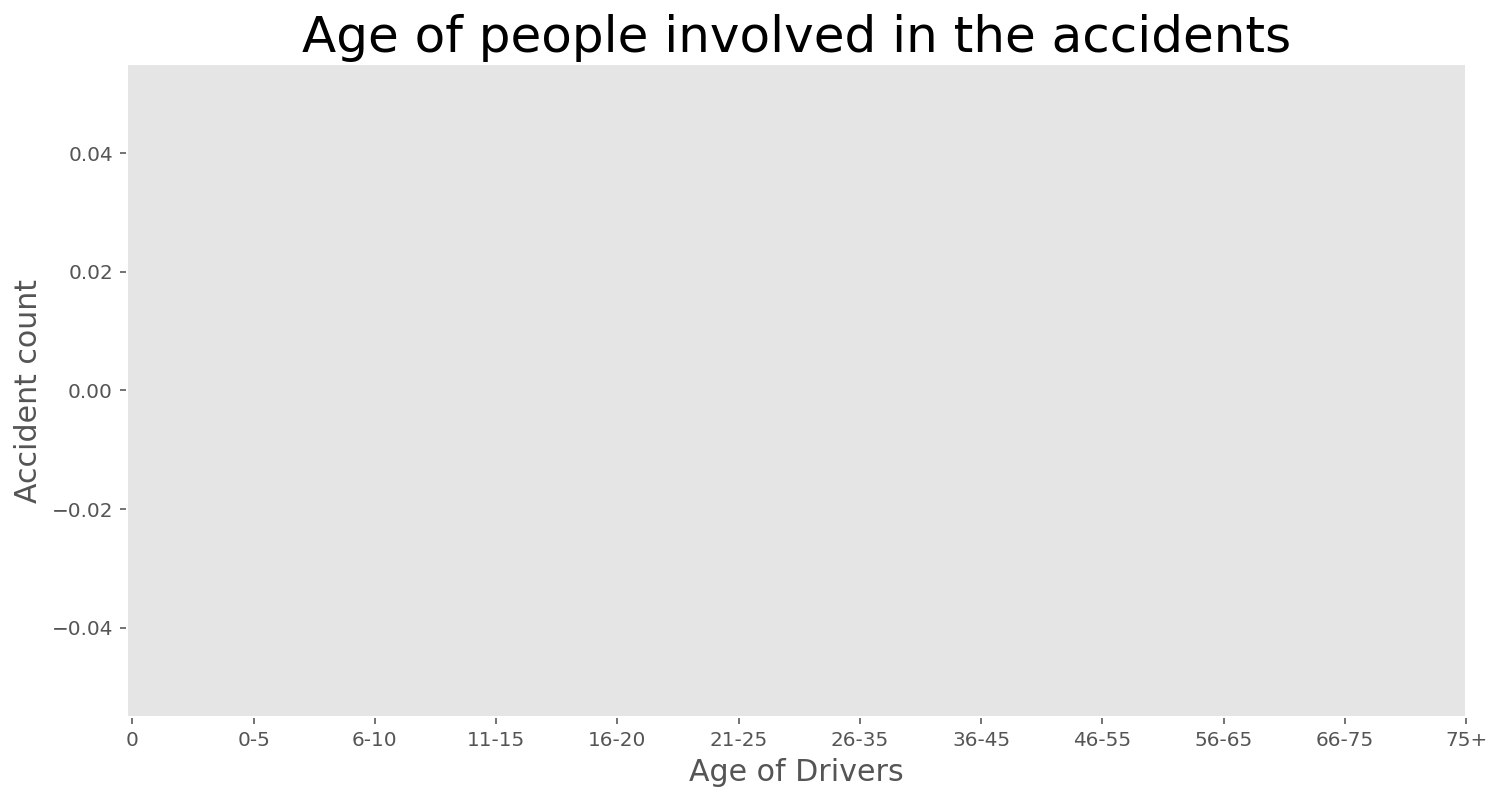

In [12]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

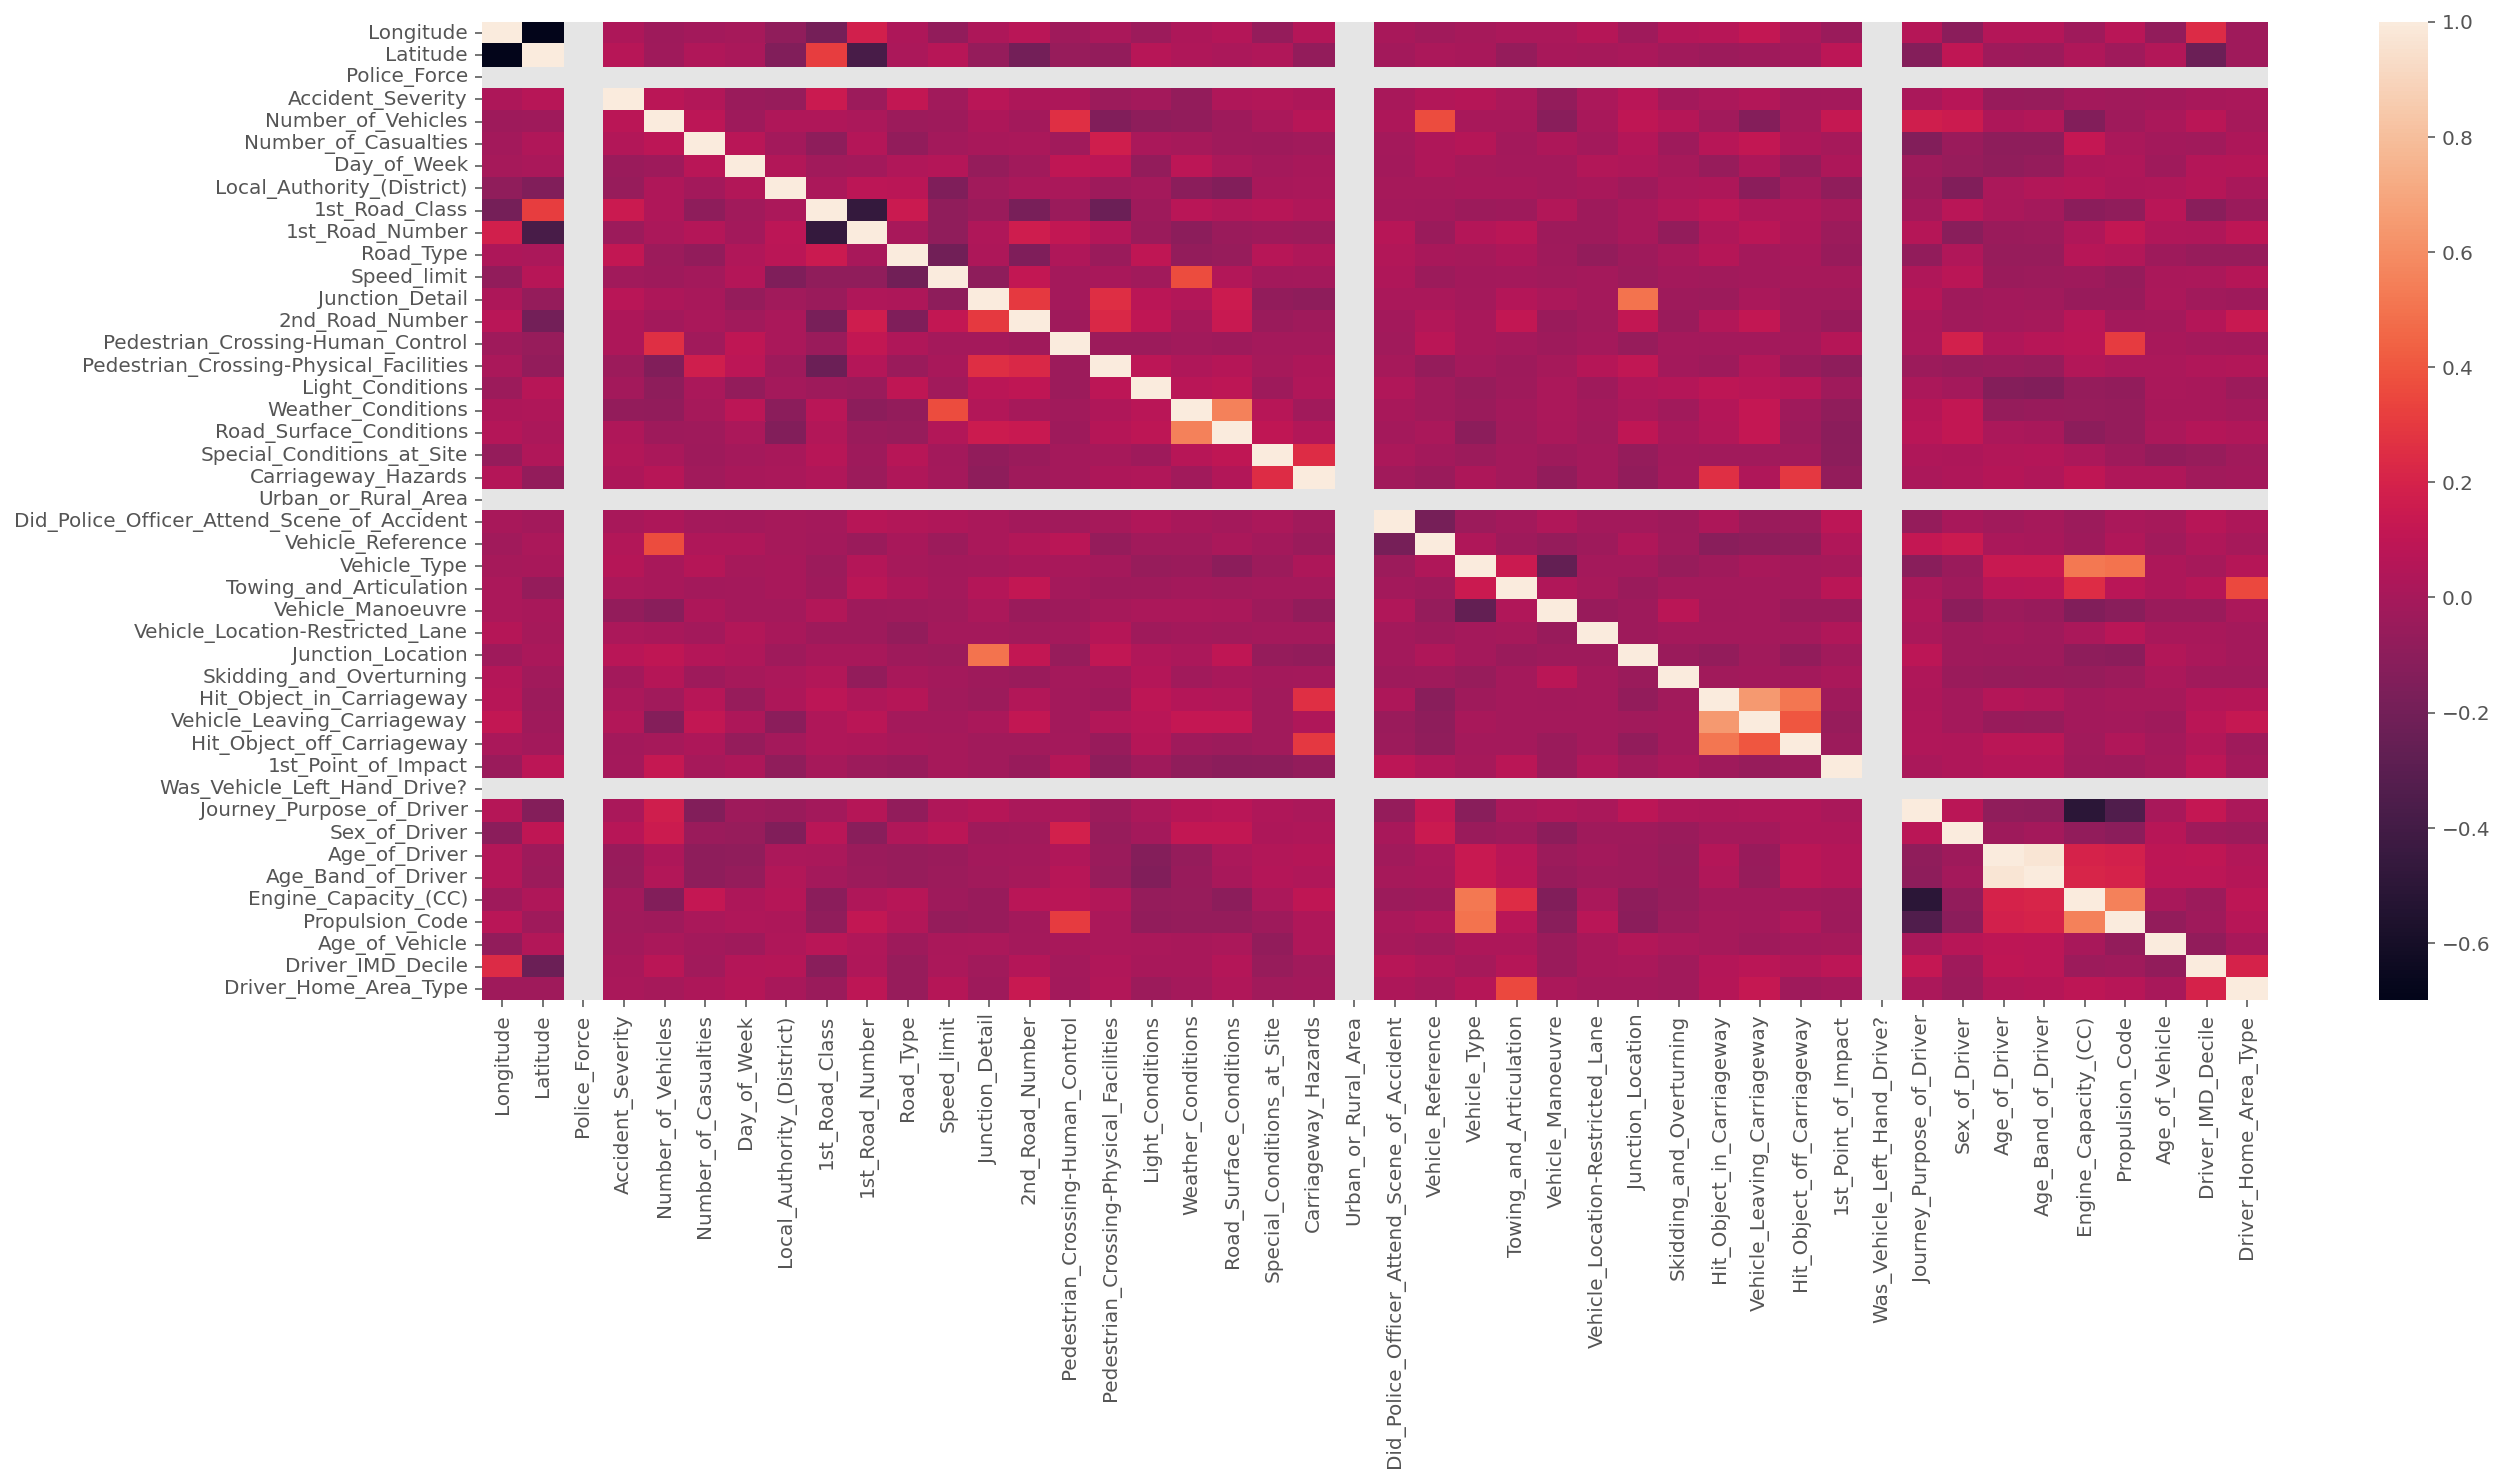

In [13]:
import seaborn as sns
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [14]:
accidents_2014 = accidents[accidents.Date_time.dt.year ==2014]
accidents_2014_01 = accidents_2014[accidents_2014.Accident_Severity == 1]
accidents_2014_02 = accidents_2014[accidents_2014.Accident_Severity == 2]
accidents_2014_03 = accidents_2014[accidents_2014.Accident_Severity == 3]

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

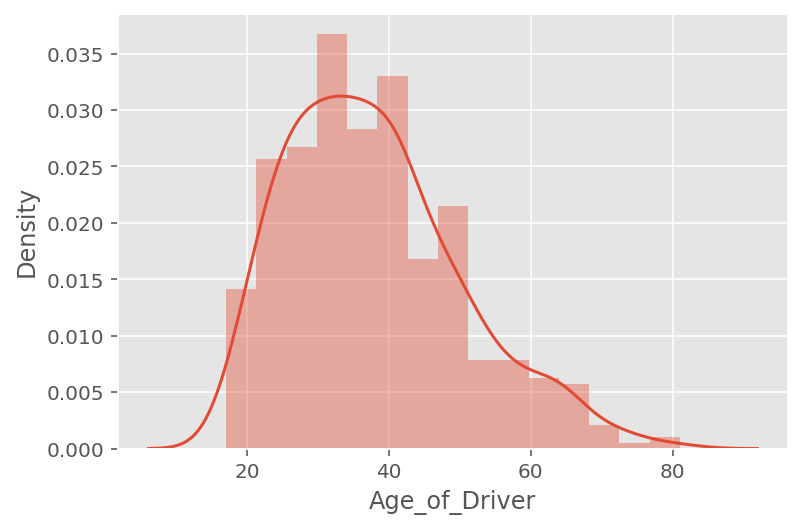

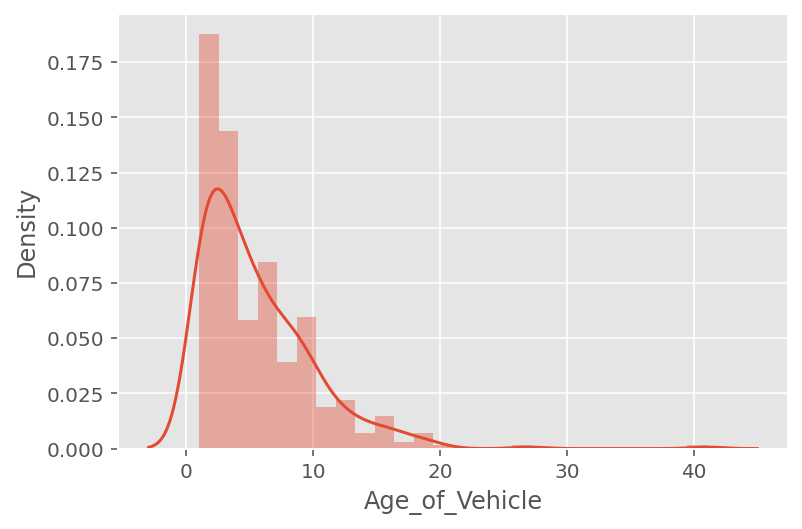

<Figure size 432x288 with 0 Axes>

In [16]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

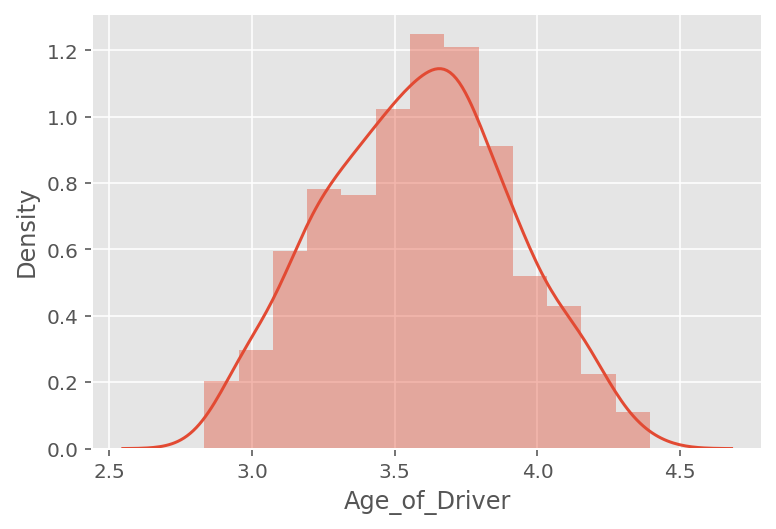

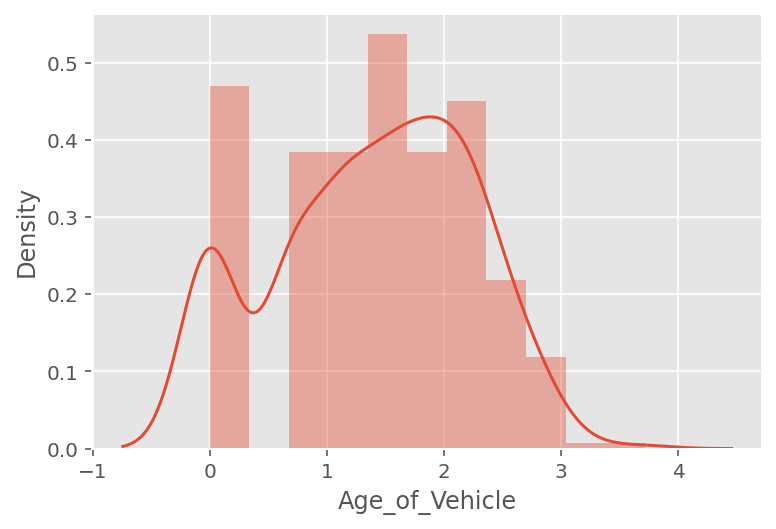

<Figure size 432x288 with 0 Axes>

In [17]:
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

In [18]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)

In [45]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("DT Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

DT Accuracy 75.56
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         5
           3   0.931507  0.800000  0.860759        85

    accuracy                       0.755556        90
   macro avg   0.465753  0.400000  0.430380        90
weighted avg   0.879756  0.755556  0.812940        90



Predicted,2,3,All
Actual,,,
2,0,5,5
3,17,68,85
All,17,73,90


In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Fit the model on the trainng data.
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)
#print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
lr_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
accscore=accuracy_score(y_test, np.round(abs(y_pred)), normalize=False) 
print("Linear regression Accuracy:",accscore)
print(lr_report)

Linear regression Accuracy: 85
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         5
           3   0.935897  0.858824  0.895706        85

    accuracy                       0.811111        90
   macro avg   0.467949  0.429412  0.447853        90
weighted avg   0.883903  0.811111  0.845944        90



In [21]:
from sklearn import *

In [22]:
#Gaussian Process Classification
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel_gp = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel_gp)

gpc.fit(X_train,y_train)
predictions = gpc.predict(X_test)

In [25]:
print("GP Accuracy:",metrics.accuracy_score(y_test, predictions)*100)

      
print("GP  Report :",classification_report(y_test, predictions))

GP Accuracy: 94.44444444444444
GP  Report :               precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.94      1.00      0.97        85

    accuracy                           0.94        90
   macro avg       0.47      0.50      0.49        90
weighted avg       0.89      0.94      0.92        90

